# Data Plotting

This notebook provides a tutorial for plotting the output of tidy3d simulations.

In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100

import numpy as np
import matplotlib.pylab as plt

import sys
sys.path.append('../')

import tidy3d as td
import tidy3d_core as tdcore

## Setup

### Creating Simulation

First, let's make a `td.Simulation` so we have data to plot.

In [2]:
# make samplers that define the freq and time domain measurement
freqs = np.linspace(1e14, 4e14, 51)

num_modes = 3

simulation = td.Simulation(
    size=(5.0, 5.0, 5.0),
    grid_size=(0.1, 0.1, 0.1),
    run_time = 1e-12,
    pml_layers = [None, None, None],
    structures = [
        td.Structure(
            geometry=td.Box(center=(-1,0,0), size=(.6,.6,.6)),
            medium=td.Medium(permittivity=2)
        ),
        td.Structure(
            geometry=td.Box(center=(1,0,0), size=(.6,.6,.6)),
            medium=td.Medium(permittivity=2)
        )        
    ],
    monitors={
        "field": td.FieldMonitor(
            fields=['Ex', 'Ey', 'Ez'],
            size=(3,3,3),
            center=(0,0,0),
            freqs=freqs),
        # "field_time": td.FieldTimeMonitor(
        #     size=(3,3,3),
        #     center=(0,0,0),
        #     interval=10),
        "flux": td.FluxMonitor(
            size=(1,1,0),
            center=(0,0,0),
            freqs=freqs),
        # "flux_time": td.FluxTimeMonitor(
        #     size=(1,1,0),
        #     center=(0,0,0),
        #     interval=10),
        "mode": td.ModeMonitor(
            size=(1,1,0),
            center=(0,0,0),
            freqs=freqs,
            modes=[td.Mode(mode_index=i) for i in range(num_modes)])
    },
)

In [3]:
import tidy3d.web as web
sim_data = web.run(simulation, task_name='viz_data', path='data/simulation.hdf5')

[13:39:14] INFO     Creating task.                                              ]8;id=151683;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:329

           INFO     Uploading the json file                                     ]8;id=311519;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:338

Output()

[13:39:29] status = preprocess                                                  ]8;id=620467;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/tidy3d/web/webapi.py\webapi.py]8;;\:158

[13:39:51] status = running                                                     ]8;id=58125;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/tidy3d/web/webapi.py\webapi.py]8;;\:158

[13:40:53] status = postprocess                                                 ]8;id=201855;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/tidy3d/web/webapi.py\webapi.py]8;;\:158

[13:40:54] status = visualize                                                   ]8;id=951454;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/tidy3d/web/webapi.py\webapi.py]8;;\:158

[13:40:58] status = success                                                     ]8;id=228790;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/tidy3d/web/webapi.py\webapi.py]8;;\:158

[13:40:58] INFO     clearing existing files before downloading                  ]8;id=521829;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:220

           INFO     removing file data/simulation.hdf5                          ]8;id=720342;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:402

           INFO     downloading file "simulation.json" to                       ]8;id=684372;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:371
                    "data/simulation.json"

Output()

[13:40:59] INFO     downloading file "monitor_data.hdf5" to                     ]8;id=66869;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:371
                    "data/monitor_data.hdf5"

Output()

[13:41:05] INFO     getting log string                                          ]8;id=187242;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:229

           INFO     downloading file "tidy3d.log" to "data/tidy3d.log"          ]8;id=248424;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:371

Output()

[13:41:06] INFO     loading old monitor data to data dict                       ]8;id=356771;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:234

           INFO     creating SimulationData from monitor data dict              ]8;id=54254;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:239

           INFO     exporting SimulationData to data/simulation.hdf5            ]8;id=162480;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:246

           INFO     clearing extraneous files                                   ]8;id=56962;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:249

           INFO     removing file data/simulation.json                          ]8;id=290795;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:402

           INFO     removing file data/monitor_data.hdf5                        ]8;id=211668;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:402

           INFO     removing file data/tidy3d.log                               ]8;id=954941;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:402

           INFO     loading SimulationData from data/simulation.hdf5            ]8;id=386126;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:280

## Plotting

Here we show how to plot data from each monitor

### Flux Data

`td.FluxData` and `td.FluxTimeData` is the simplest because it just stores the electromagnetic power flux through a surface as a function of the frequency and time, respectively.

First, we access the `td.MonitorData` through the dictionary `sim_data.monitor_data`.

In [4]:
# get the flux data from that monitor name
flux_data = sim_data['flux']
# flux_time_data = sim_data['flux_time']

and we can plot the values using the `td.MonitorData.plot()` method.

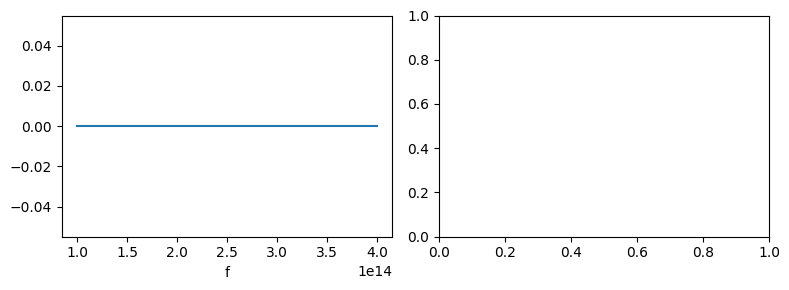

In [6]:
f, (ax1, ax2) = plt.subplots(1, 2, tight_layout=True, figsize=(8,3))
flux_data.real.plot(ax=ax1)
# flux_time_data.plot(ax=ax2)

plt.show()

## Plotting Mode Data

The axes of mode data correspond to direction (+/-), mode_index, and sampler axes. 

To pot all of this data, we make two subplots and use the builting `.sel()` function to select the data to plot in each axis.

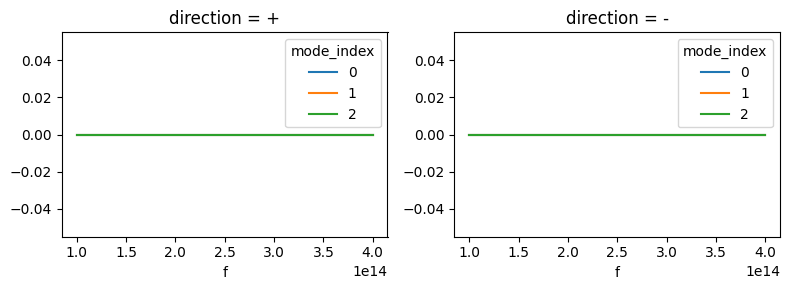

In [7]:
# tip: you can also get the monitor data directly by indexing it's name in `SimulationData`
mode_data = sim_data['mode']

f, (ax1, ax2) = plt.subplots(1, 2, tight_layout=True, figsize=(8, 3))

mode_data.sel(direction='+').real.plot.line(x='f', ax=ax1)
mode_data.sel(direction='-').real.plot.line(x='f', ax=ax2)
plt.show()


### Plotting Fields

Let's grab the field data and plot.

In [8]:
field_data = sim_data['field']

#### Electromagnetic Fields

In [9]:
# get the field data on the z=1.0 plane at frequency f=7.5
field_data = sim_data['field']
field_plane = field_data.interp(f=7.5, z=1.0)

##### Amplitude Plots

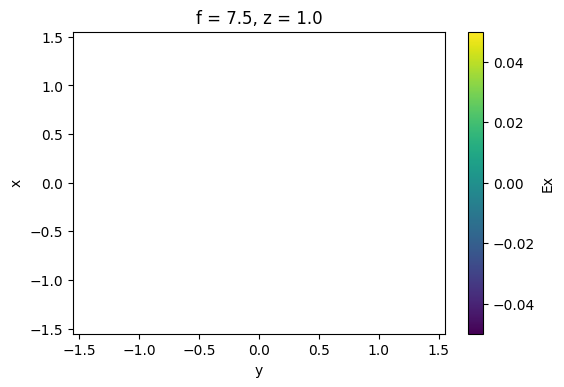

In [10]:
# amplitude plot of Ex(x,y) field on plane
field_plane.Ex.real.plot()
plt.show()

##### Quiver Plots

/usr/local/lib/python3.9/site-packages/matplotlib/quiver.py:661: RuntimeWarning: Mean of empty slice.
  amean = a[~self.Umask].mean()
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


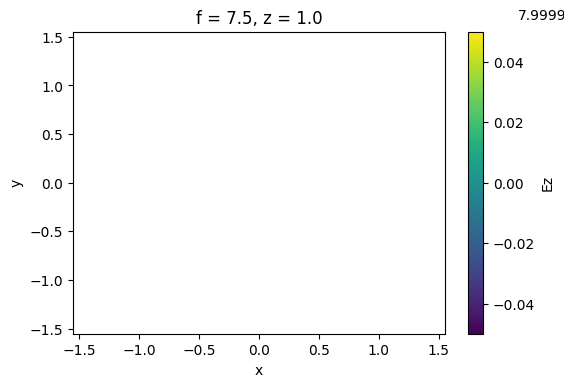

In [11]:
# quiver plot of E_{x,y}(x,y) on plane with Ez(x,y) underlying.
f, ax = plt.subplots()
field_plane.Ez.real.plot(ax=ax)
field_plane.real.plot.quiver('x', 'y', 'Ex', 'Ey', ax=ax)
plt.show()

##### Structure Overlay
One can overlay the structure permittivity by calling `plot_fields` from the `td.SimulationData` object as follows:

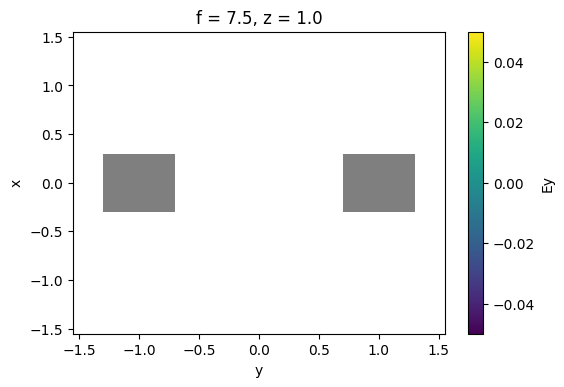

In [12]:
_, ax = plt.subplots(1,1)
sim_data.simulation.plot_structures_eps(z=0.0, ax=ax, alpha=.5, cbar=False, lw=0)
field_plane.Ey.real.plot(ax=ax)
plt.show()

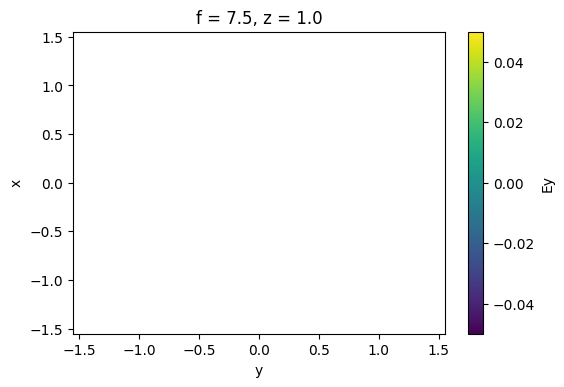

In [16]:
_, ax = plt.subplots(1,1)
# sim_data.plot_fields('field_plane')
field_plane.Ey.real.plot(ax=ax)
plt.show()

#### Permittivity

If we've stored permittivity by specifing `eps_xx`, `eps_yy` or `eps_zz` in the `FieldMonitor`'s `fields`, we can access them and plot as follows.

In [17]:
# eps_xx = field_data.eps_xx
# xx_component_plane = eps_xx.interp(z=1.0, f=7.5)
# xx_component_plane.real.plot(cmap='gist_yarg')
# plt.show()

## Tricks and Tips

The `td.MonitorData` objects can be found by indexing `td.SimulationData` directly.

In [18]:
assert np.all(sim_data.monitor_data['mode'].data == sim_data['mode'])

Keyword arguments are passed to the correponding `.plot()` calls internally, so you can customize the plots.

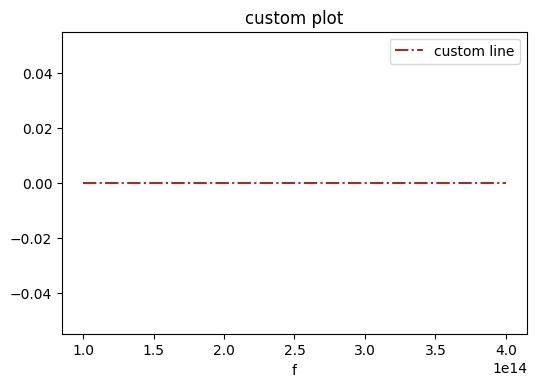

In [19]:
sim_data['flux'].plot(color='brown', linestyle='-.', label='custom line')
plt.legend()
plt.title('custom plot')
plt.show()